# API data

## Install libraries

In [2]:
!pip install google_play_scraper

In [3]:
!pip install app_store_scraper

## Import libraries

In [7]:
from google_play_scraper import app, Sort, reviews_all
from app_store_scraper import AppStore
import pandas as pd
import numpy as np
import json, os, uuid

## API users' review from CH Play and AppStore

In [8]:
g_reviews = reviews_all(
        "sort.water.puzzle.pour.color.tubes.sorting.game",
        sleep_milliseconds=0, # mặc định là 0
        lang='en', # mặc định là 'vi'
        country='us', # mặc định là 'us'
        sort=Sort.NEWEST, # mặc định là Sort.MOST_REELEVANT
    )
a_reviews = AppStore('us', 'sort-water-color-puzzle', '1575680675')
a_reviews.review()

2023-06-25 09:52:35,458 [INFO] Base - Initialised: AppStore('us', 'sort-water-color-puzzle', 1575680675)
2023-06-25 09:52:35,458 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/sort-water-color-puzzle/id1575680675
2023-06-25 09:52:38,305 [INFO] Base - [id:1575680675] Fetched 558 reviews (558 fetched in total)


In [9]:
g_df = pd.DataFrame(np.array(g_reviews),columns=['review'])
g_df2 = g_df.join(pd.DataFrame(g_df.pop('review').tolist()))
 
g_df2.drop(columns={'userImage', 'reviewCreatedVersion'},inplace = True)
g_df2.rename(columns= {'score': 'rating','userName': 'user_name', 'reviewId': 'review_id', 'content': 'review_description', 'at': 'review_date', 'replyContent' : 'developer_response', 'repliedAt': 'developer_response_date', 'thumbsUpCount': 'thumbs_up'},inplace = True)
g_df2.insert(loc=0, column='source', value='Google Play')
g_df2.insert(loc=3, column='review_title', value=None)
g_df2['laguage_code'] = 'en'
g_df2['country_code'] = 'us'
g_df2

,source,review_id,user_name,review_title,review_description,rating,thumbs_up,review_date,developer_response,developer_response_date,appVersion,laguage_code,country_code
0,Google Play,98fa93e6-9824-4925-be65-703b1bd14b6e,Ernesto Abussi,None,It's the best adults if r child is under 12 it...,5,0,2023-06-23 13:51:00,None,NaT,1.7.5,en,us
1,Google Play,4558d26c-c223-46f1-a147-6b9e481ca104,Mary Pinkston,None,Logical,5,0,2023-06-20 23:00:46,None,NaT,1.5.0,en,us
2,Google Play,fc75e6be-52a2-40cd-889c-5d52d58c5329,Viking,None,Id rate higher if it didnt force the extra bot...,2,0,2023-06-19 06:58:16,None,NaT,1.7.5,en,us
3,Google Play,e5251950-a650-493f-aa44-bb555906f599,Elsie Ludick,None,Wonderful game,5,0,2023-06-19 01:56:45,None,NaT,1.7.5,en,us
4,Google Play,f8e293e0-c40a-4a33-b941-887a88e540ff,Hasan Khalil,None,Nice,5,0,2023-06-18 07:50:42,None,NaT,1.7.5,en,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15158,Google Play,7323363a-1209-493a-801e-746e45569ccf,Mylene Ferry,None,🤩🤩🤩🤩🤩🤩🤩🤩🤩🤩🤩🤩🤩🤩❤️🧡💛💚💙💜🖤📲💽🛋️📱,5,18,2021-06-29 15:39:17,None,NaT,None,en,us
15159,Google Play,7ee45343-9457-478e-b8db-4b80901cbcd5,Dametia Jo Woodruff,None,Homemaker,5,10,2021-06-29 14:23:06,None,NaT,1.04,en,us
15160,Google Play,2a8decff-f1ac-4b89-a82c-cde58f04cea9,ikram ikram,None,Super,5,4,2021-06-29 04:26:55,None,NaT,None,en,us
15161,Google Play,a9131ad5-7635-4676-8803-39cbfb4d096b,Quan Hickman,None,Please let me play with it please let me,5,42,2021-06-27 12:53:49,None,NaT,None,en,us


In [10]:
a_df = pd.DataFrame(np.array(a_reviews.reviews),columns=['review'])
a_df2 = a_df.join(pd.DataFrame(a_df.pop('review').tolist()))

a_df2.drop(columns={'isEdited'},inplace = True)
a_df2.insert(loc=0, column='source', value='App Store')
a_df2['developer_response_date'] = None
a_df2['thumbs_up'] = None
a_df2['laguage_code'] = 'en'
a_df2['country_code'] = 'us'
a_df2.insert(loc=1, column='review_id', value=[uuid.uuid4() for _ in range(len(a_df2.index))]) 
a_df2.rename(columns= {'review': 'review_description','userName': 'user_name', 'date': 'review_date','title': 'review_title', 'developerResponse': 'developer_response'},inplace = True)
a_df2 = a_df2.where(pd.notnull(a_df2), None)
a_df2

,source,review_id,review_date,review_description,rating,user_name,review_title,developer_response_date,thumbs_up,laguage_code,country_code
0,App Store,af327577-7192-4acb-8372-260564af1ded,2023-06-21 12:45:18,"This game is absolutely amazing! First of all,...",5,Hayyeeyeecarlos,AWESOME GAME!,None,None,en,us
1,App Store,6a72aee1-9a62-4544-9024-5d8f427cc47e,2022-02-23 20:56:58,I absolutely am obsessed with this game!! It’s...,5,Just a small town girl 💗,"I LOVVVE THIS GAME, just a few problems/sugges...",None,None,en,us
2,App Store,60ab0c5e-22e3-4fb5-862e-32ac6ec4bca8,2021-11-19 05:46:37,I like the fact that it's not a race against t...,5,D432578537,Relaxing,None,None,en,us
3,App Store,b10e73bd-957b-4148-93d2-b8a88f31bc12,2022-10-17 18:52:07,I would rate it 4.5 stars if I could. I thinks...,4,JG2580,Pretty great but not perfect,None,None,en,us
4,App Store,162c8d85-8a9b-4d14-bb66-17be84ee0aff,2022-05-30 09:37:48,TL;DR The game is super fun and I love it to p...,3,oreo_chickadee,Has an ad issue,None,None,en,us
...,...,...,...,...,...,...,...,...,...,...,...
553,App Store,d1dfa3ad-5cd0-4a03-adb3-2c54868dba42,2021-11-08 00:21:55,This game is fun and good.Download it now.,5,siklb,Very good.,None,None,en,us
554,App Store,4ca48f4b-a0c1-472a-abd3-5a78a8ace7f0,2021-12-27 02:43:36,This game is fun but after awhile it gets burn...,3,kuteKrazykoala 3,Koala girl5678934,None,None,en,us
555,App Store,cf5d3b2a-0027-4608-9031-b381dabf7321,2021-11-01 16:19:03,Sooooooooooooo goood,5,NN fan OG,Omg,None,None,en,us
556,App Store,8f187254-4d81-4c2d-8e88-f5697f1092f6,2021-10-02 19:20:09,I NEVER play games on my phone. This game was ...,5,Jellypuffs,Great time waster!,None,None,en,us


## Concatenating results between CH Play and AppStore

In [32]:
result2 = pd.concat([g_df2,a_df2])
result2

,source,review_id,user_name,review_title,review_description,rating,thumbs_up,review_date,developer_response,developer_response_date,appVersion,laguage_code,country_code
0,Google Play,98fa93e6-9824-4925-be65-703b1bd14b6e,Ernesto Abussi,None,It's the best adults if r child is under 12 it...,5,0,2023-06-23 13:51:00,None,NaT,1.7.5,en,us
1,Google Play,4558d26c-c223-46f1-a147-6b9e481ca104,Mary Pinkston,None,Logical,5,0,2023-06-20 23:00:46,None,NaT,1.5.0,en,us
2,Google Play,fc75e6be-52a2-40cd-889c-5d52d58c5329,Viking,None,Id rate higher if it didnt force the extra bot...,2,0,2023-06-19 06:58:16,None,NaT,1.7.5,en,us
3,Google Play,e5251950-a650-493f-aa44-bb555906f599,Elsie Ludick,None,Wonderful game,5,0,2023-06-19 01:56:45,None,NaT,1.7.5,en,us
4,Google Play,f8e293e0-c40a-4a33-b941-887a88e540ff,Hasan Khalil,None,Nice,5,0,2023-06-18 07:50:42,None,NaT,1.7.5,en,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,App Store,d1dfa3ad-5cd0-4a03-adb3-2c54868dba42,siklb,Very good.,This game is fun and good.Download it now.,5,None,2021-11-08 00:21:55,NaN,NaT,NaN,en,us
554,App Store,4ca48f4b-a0c1-472a-abd3-5a78a8ace7f0,kuteKrazykoala 3,Koala girl5678934,This game is fun but after awhile it gets burn...,3,None,2021-12-27 02:43:36,NaN,NaT,NaN,en,us
555,App Store,cf5d3b2a-0027-4608-9031-b381dabf7321,NN fan OG,Omg,Sooooooooooooo goood,5,None,2021-11-01 16:19:03,NaN,NaT,NaN,en,us
556,App Store,8f187254-4d81-4c2d-8e88-f5697f1092f6,Jellypuffs,Great time waster!,I NEVER play games on my phone. This game was ...,5,None,2021-10-02 19:20:09,NaN,NaT,NaN,en,us


## Save result to csv file

In [33]:
df = pd.DataFrame(result2)  # Chuyển đổi dữ liệu đánh giá thành DataFrame
df.to_csv('result2.csv', index=False)  # Lưu DataFrame vào file CSV

In [35]:
df_read = pd.read_csv('result2.csv')  # Đọc file CSV
print(df_read.head())  # Hiển thị một số hàng đầu tiên của DataFrame để kiểm tra

        source                             review_id       user_name  \
0  Google Play  98fa93e6-9824-4925-be65-703b1bd14b6e  Ernesto Abussi   
1  Google Play  4558d26c-c223-46f1-a147-6b9e481ca104   Mary Pinkston   
2  Google Play  fc75e6be-52a2-40cd-889c-5d52d58c5329          Viking   
3  Google Play  e5251950-a650-493f-aa44-bb555906f599    Elsie Ludick   
4  Google Play  f8e293e0-c40a-4a33-b941-887a88e540ff    Hasan Khalil   

  review_title                                 review_description  rating  \
0          NaN  It's the best adults if r child is under 12 it...       5   
1          NaN                                            Logical       5   
2          NaN  Id rate higher if it didnt force the extra bot...       2   
3          NaN                                     Wonderful game       5   
4          NaN                                               Nice       5   

   thumbs_up          review_date developer_response developer_response_date  \
0        0.0  2023-06-23

In [36]:
result2

,source,review_id,user_name,review_title,review_description,rating,thumbs_up,review_date,developer_response,developer_response_date,appVersion,laguage_code,country_code
0,Google Play,98fa93e6-9824-4925-be65-703b1bd14b6e,Ernesto Abussi,None,It's the best adults if r child is under 12 it...,5,0,2023-06-23 13:51:00,None,NaT,1.7.5,en,us
1,Google Play,4558d26c-c223-46f1-a147-6b9e481ca104,Mary Pinkston,None,Logical,5,0,2023-06-20 23:00:46,None,NaT,1.5.0,en,us
2,Google Play,fc75e6be-52a2-40cd-889c-5d52d58c5329,Viking,None,Id rate higher if it didnt force the extra bot...,2,0,2023-06-19 06:58:16,None,NaT,1.7.5,en,us
3,Google Play,e5251950-a650-493f-aa44-bb555906f599,Elsie Ludick,None,Wonderful game,5,0,2023-06-19 01:56:45,None,NaT,1.7.5,en,us
4,Google Play,f8e293e0-c40a-4a33-b941-887a88e540ff,Hasan Khalil,None,Nice,5,0,2023-06-18 07:50:42,None,NaT,1.7.5,en,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,App Store,d1dfa3ad-5cd0-4a03-adb3-2c54868dba42,siklb,Very good.,This game is fun and good.Download it now.,5,None,2021-11-08 00:21:55,NaN,NaT,NaN,en,us
554,App Store,4ca48f4b-a0c1-472a-abd3-5a78a8ace7f0,kuteKrazykoala 3,Koala girl5678934,This game is fun but after awhile it gets burn...,3,None,2021-12-27 02:43:36,NaN,NaT,NaN,en,us
555,App Store,cf5d3b2a-0027-4608-9031-b381dabf7321,NN fan OG,Omg,Sooooooooooooo goood,5,None,2021-11-01 16:19:03,NaN,NaT,NaN,en,us
556,App Store,8f187254-4d81-4c2d-8e88-f5697f1092f6,Jellypuffs,Great time waster!,I NEVER play games on my phone. This game was ...,5,None,2021-10-02 19:20:09,NaN,NaT,NaN,en,us


# Sentiment Analysis with Python

Sentiment Analysis: the process of computationally identifying and categorizing opinions expressed in a piece of text, especially in order to determine whether the writer's attitude towards a particular topic, product, etc. is positive, negative, or neutral.

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import LatentDirichletAllocation
import seaborn as sns

plt.style.use('ggplot')

import nltk

 ## Step 1. Read in Data and NLTK Basics

In [8]:
# Read in Data
df = pd.read_csv("result2.csv")
print(df.shape)

(15721, 13)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15721 entries, 0 to 15720
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   source                   15721 non-null  object 
 1   review_id                15721 non-null  object 
 2   user_name                15721 non-null  object 
 3   review_title             558 non-null    object 
 4   review_description       15721 non-null  object 
 5   rating                   15721 non-null  int64  
 6   thumbs_up                15163 non-null  float64
 7   review_date              15721 non-null  object 
 8   developer_response       992 non-null    object 
 9   developer_response_date  992 non-null    object 
 10  appVersion               13127 non-null  object 
 11  laguage_code             15721 non-null  object 
 12  country_code             15721 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.6+ MB


In [10]:
df.head(50)

,source,review_id,user_name,review_title,review_description,rating,thumbs_up,review_date,developer_response,developer_response_date,appVersion,laguage_code,country_code
0,Google Play,98fa93e6-9824-4925-be65-703b1bd14b6e,Ernesto Abussi,NaN,It's the best adults if r child is under 12 it...,5,0.0,2023-06-23 13:51:00,NaN,NaN,1.7.5,en,us
1,Google Play,4558d26c-c223-46f1-a147-6b9e481ca104,Mary Pinkston,NaN,Logical,5,0.0,2023-06-20 23:00:46,NaN,NaN,1.5.0,en,us
2,Google Play,fc75e6be-52a2-40cd-889c-5d52d58c5329,Viking,NaN,Id rate higher if it didnt force the extra bot...,2,0.0,2023-06-19 06:58:16,NaN,NaN,1.7.5,en,us
3,Google Play,e5251950-a650-493f-aa44-bb555906f599,Elsie Ludick,NaN,Wonderful game,5,0.0,2023-06-19 01:56:45,NaN,NaN,1.7.5,en,us
4,Google Play,f8e293e0-c40a-4a33-b941-887a88e540ff,Hasan Khalil,NaN,Nice,5,0.0,2023-06-18 07:50:42,NaN,NaN,1.7.5,en,us
5,Google Play,b0c31bfa-468d-4a34-8c4d-15f56470c87f,Masingita Wonder,NaN,Lovely game to play during lunch,5,0.0,2023-06-16 19:45:44,NaN,NaN,1.7.3,en,us
6,Google Play,f1153b25-09a8-4b7f-9dd7-90b829e074d5,Hope Chereni,NaN,Amazing,5,0.0,2023-06-15 22:04:38,NaN,NaN,1.7.5,en,us
7,Google Play,1a271617-3755-4657-aa1f-e73b33fd4676,Semir Mussa3310,NaN,So fantastic 👏,5,0.0,2023-06-15 18:01:12,NaN,NaN,1.7.5,en,us
8,Google Play,4910f4b7-8bbb-4385-820c-54be8fcbcf3d,Ramsharan Ramsharn gurjar,NaN,Xxx,2,0.0,2023-06-14 14:13:49,NaN,NaN,NaN,en,us
9,Google Play,726b018d-ba00-4cda-b419-0cee9c1296fb,Anil pratap Singh,NaN,Jitne ke bad no mony ricevsd,1,0.0,2023-06-14 07:52:24,NaN,NaN,1.7.5,en,us


### Drop unused columns

In [11]:
columns_to_drop = ['thumbs_up', 'developer_response', 'developer_response_date', 'appVersion', 'laguage_code', 'country_code']

df.drop(columns=columns_to_drop, inplace=True)

In [12]:
df.head(100)

,source,review_id,user_name,review_title,review_description,rating,review_date
0,Google Play,98fa93e6-9824-4925-be65-703b1bd14b6e,Ernesto Abussi,NaN,It's the best adults if r child is under 12 it...,5,2023-06-23 13:51:00
1,Google Play,4558d26c-c223-46f1-a147-6b9e481ca104,Mary Pinkston,NaN,Logical,5,2023-06-20 23:00:46
2,Google Play,fc75e6be-52a2-40cd-889c-5d52d58c5329,Viking,NaN,Id rate higher if it didnt force the extra bot...,2,2023-06-19 06:58:16
3,Google Play,e5251950-a650-493f-aa44-bb555906f599,Elsie Ludick,NaN,Wonderful game,5,2023-06-19 01:56:45
4,Google Play,f8e293e0-c40a-4a33-b941-887a88e540ff,Hasan Khalil,NaN,Nice,5,2023-06-18 07:50:42
...,...,...,...,...,...,...,...
95,Google Play,1a70d21e-d13e-4c7e-b9cb-1cc5c5094680,Abd El rahman Shahawy,NaN,"It is a cheat game ,not sending money as the p...",1,2023-04-23 05:53:21
96,Google Play,b4118c9d-3810-4e62-b021-97d0bdf2d387,Bunmi Titus,NaN,Beautiful,5,2023-04-23 03:38:36
97,Google Play,7c064fd7-69fb-4eb2-b639-dc558daec497,Rosemary Lewty,NaN,This is so relaxing! Love it,5,2023-04-23 01:38:08
98,Google Play,6a31a10b-11a3-4fd4-afad-12d9a3f948e9,Sushanta Mandal,NaN,Adware. Not recommended,1,2023-04-22 22:45:29


### Add ID columns for dataset

In [13]:
df['ID'] = range(1, len(df) + 1)
df.head(100)

,source,review_id,user_name,review_title,review_description,rating,review_date,ID
0,Google Play,98fa93e6-9824-4925-be65-703b1bd14b6e,Ernesto Abussi,NaN,It's the best adults if r child is under 12 it...,5,2023-06-23 13:51:00,1
1,Google Play,4558d26c-c223-46f1-a147-6b9e481ca104,Mary Pinkston,NaN,Logical,5,2023-06-20 23:00:46,2
2,Google Play,fc75e6be-52a2-40cd-889c-5d52d58c5329,Viking,NaN,Id rate higher if it didnt force the extra bot...,2,2023-06-19 06:58:16,3
3,Google Play,e5251950-a650-493f-aa44-bb555906f599,Elsie Ludick,NaN,Wonderful game,5,2023-06-19 01:56:45,4
4,Google Play,f8e293e0-c40a-4a33-b941-887a88e540ff,Hasan Khalil,NaN,Nice,5,2023-06-18 07:50:42,5
...,...,...,...,...,...,...,...,...
95,Google Play,1a70d21e-d13e-4c7e-b9cb-1cc5c5094680,Abd El rahman Shahawy,NaN,"It is a cheat game ,not sending money as the p...",1,2023-04-23 05:53:21,96
96,Google Play,b4118c9d-3810-4e62-b021-97d0bdf2d387,Bunmi Titus,NaN,Beautiful,5,2023-04-23 03:38:36,97
97,Google Play,7c064fd7-69fb-4eb2-b639-dc558daec497,Rosemary Lewty,NaN,This is so relaxing! Love it,5,2023-04-23 01:38:08,98
98,Google Play,6a31a10b-11a3-4fd4-afad-12d9a3f948e9,Sushanta Mandal,NaN,Adware. Not recommended,1,2023-04-22 22:45:29,99


In [14]:
id_column = df.pop('ID')
df.insert(0, 'ID', id_column)
df.head(100)

,ID,source,review_id,user_name,review_title,review_description,rating,review_date
0,1,Google Play,98fa93e6-9824-4925-be65-703b1bd14b6e,Ernesto Abussi,NaN,It's the best adults if r child is under 12 it...,5,2023-06-23 13:51:00
1,2,Google Play,4558d26c-c223-46f1-a147-6b9e481ca104,Mary Pinkston,NaN,Logical,5,2023-06-20 23:00:46
2,3,Google Play,fc75e6be-52a2-40cd-889c-5d52d58c5329,Viking,NaN,Id rate higher if it didnt force the extra bot...,2,2023-06-19 06:58:16
3,4,Google Play,e5251950-a650-493f-aa44-bb555906f599,Elsie Ludick,NaN,Wonderful game,5,2023-06-19 01:56:45
4,5,Google Play,f8e293e0-c40a-4a33-b941-887a88e540ff,Hasan Khalil,NaN,Nice,5,2023-06-18 07:50:42
...,...,...,...,...,...,...,...,...
95,96,Google Play,1a70d21e-d13e-4c7e-b9cb-1cc5c5094680,Abd El rahman Shahawy,NaN,"It is a cheat game ,not sending money as the p...",1,2023-04-23 05:53:21
96,97,Google Play,b4118c9d-3810-4e62-b021-97d0bdf2d387,Bunmi Titus,NaN,Beautiful,5,2023-04-23 03:38:36
97,98,Google Play,7c064fd7-69fb-4eb2-b639-dc558daec497,Rosemary Lewty,NaN,This is so relaxing! Love it,5,2023-04-23 01:38:08
98,99,Google Play,6a31a10b-11a3-4fd4-afad-12d9a3f948e9,Sushanta Mandal,NaN,Adware. Not recommended,1,2023-04-22 22:45:29


### Quick EDA

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15721 entries, 0 to 15720
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  15721 non-null  int64 
 1   source              15721 non-null  object
 2   review_id           15721 non-null  object
 3   user_name           15721 non-null  object
 4   review_title        558 non-null    object
 5   review_description  15721 non-null  object
 6   rating              15721 non-null  int64 
 7   review_date         15721 non-null  object
dtypes: int64(2), object(6)
memory usage: 982.7+ KB


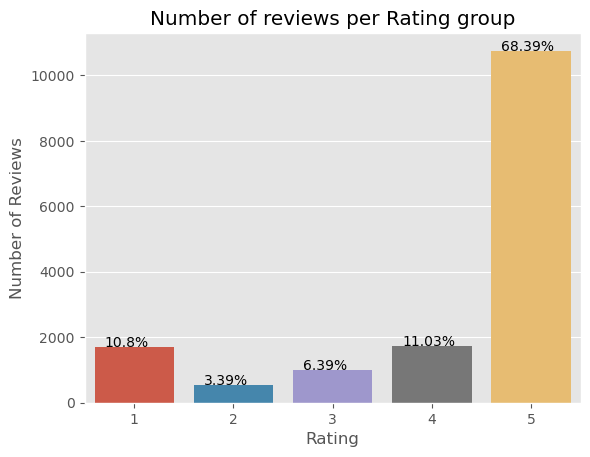

In [38]:
sns.color_palette("RdBu_r")
ax = sns.countplot(x=df["rating"])
ax.set(xlabel='Rating', ylabel='Number of Reviews',
       title='Number of reviews per Rating group')

for p in ax.patches:
    txt = str(((p.get_height()/15721 )*100).round(2)) + '%'
    txt_x = p.get_x() + 0.1
    txt_y = p.get_height() +5
    ax.text(txt_x,txt_y,txt)

plt.show()

### Data transformation

In [107]:
df['review_description_lower'] = df['review_description'].astype(str).str.lower()
df.head(5)

,review_title,review_description,review_description_lower,rating,0_GameDifficulty,1_GamePlay,2_GamingExperience,review_topic,lemmatized_processed_text
0,NaN,It's the best adults if r child is under 12 it...,it's the best adults if r child is under 12 it...,5,0.450489,0.128723,0.420787,GameDifficulty,"['s, best, adult, r, child, 12, actually, take..."
1,NaN,Logical,logical,5,0.166845,0.179741,0.653414,GamingExperience,[Logical]
2,NaN,Id rate higher if it didnt force the extra bot...,id rate higher if it didnt force the extra bot...,2,0.215953,0.753701,0.030346,GamePlay,"[Id, rate, higher, didnt, force, extra, bottle..."
3,NaN,Wonderful game,wonderful game,5,0.542461,0.114942,0.342597,GameDifficulty,"[Wonderful, game]"
4,NaN,Nice,nice,5,0.166667,0.166667,0.666665,GamingExperience,[Nice]


### Extracting relevant features for topic modelling

In [41]:
tm_df = df[["review_title", "review_description", "review_description_lower", "rating"]]
tm_df.head(5)

,review_title,review_description,review_description_lower,rating
0,NaN,It's the best adults if r child is under 12 it...,it's the best adults if r child is under 12 it...,5
1,NaN,Logical,logical,5
2,NaN,Id rate higher if it didnt force the extra bot...,id rate higher if it didnt force the extra bot...,2
3,NaN,Wonderful game,wonderful game,5
4,NaN,Nice,nice,5


## Step 2. Topic modeling using LDA

## converting reviews to document term matrix

In [45]:
# discards words that occur in more than 97% of documents, and include words that occur at least in 2 documents
cv = CountVectorizer(max_df=0.97, min_df=2, stop_words='english')
doc_term_matrix = cv.fit_transform(tm_df['review_description_lower'])
doc_term_matrix

<15721x2631 sparse matrix of type '<class 'numpy.int64'>'
	with 51517 stored elements in Compressed Sparse Row format>

### hyperparameter tuning using gridsearch

In [46]:
lda=LatentDirichletAllocation(random_state=101, n_jobs=-1)
param_grid = { 
    'n_components': [3, 4, 5, 10, 15],
    'max_iter': [5, 10, 15, 20, 25],
    'learning_decay': [.5, .7, .9]
}

In [63]:
LDA=LatentDirichletAllocation(random_state=101, n_jobs=-1, learning_decay = 0.5, max_iter = 25, n_components = 3)
LDA.fit(doc_term_matrix)

LatentDirichletAllocation(learning_decay=0.5, max_iter=25, n_components=3,
                          n_jobs=-1, random_state=101)

In [64]:
for index,topic in enumerate(LDA.components_):
    print(f'topic #{index} : ')
    print([cv.get_feature_names_out()[i] for i in topic.argsort()[-30:]])

topic #0 : 
['download', 'water', 'free', 'got', 'enjoy', 'colors', 'makes', 'hard', 'make', 'way', 'bad', 'think', 'pass', 'playing', 'adds', 'challenging', 'levels', 'games', 'don', 'level', 'really', 'just', 'play', 'easy', 'super', 'ads', 'app', 'time', 'like', 'game']
topic #1 : 
['annoying', 'option', 'button', 'bottle', 'need', 'simple', 'hai', 'bored', 'challenge', 'tube', 'boring', 'puzzle', 'new', 'add', 'extra', 'entertaining', 'keeps', 'playing', 'just', 'watch', 'play', 'ok', 'addictive', 'awesome', 'ad', 'level', 'game', 'ads', 'love', 'fun']
topic #2 : 
['puzzle', 'work', 'thanks', 'relax', 'stress', 'enjoy', 'kids', 'far', 'satisfying', 'beautiful', 'thinking', 'superb', 'enjoying', 'thank', 'fantastic', 'helps', 'play', 'excellent', 'really', 'cool', 'amazing', 'interesting', 'brain', 'best', 'mind', 'relaxing', 'great', 'nice', 'good', 'game']


In [53]:
tm_df = tm_df.reset_index(drop=True)

In [66]:
topic = LDA.transform(doc_term_matrix)
df_topic = pd.DataFrame(topic, columns=[
'0_GameDifficulty',
'1_GamePlay' ,
'2_GamingExperience'
])
df = pd.merge(tm_df, df_topic,  how='inner', left_index=True, right_index=True )

In [74]:
def return_topic(row):
    if row["1_GamePlay"] > row["0_GameDifficulty"] and row["1_GamePlay"] > row["2_GamingExperience"]:
        return "GamePlay"
    if row["0_GameDifficulty"] > row["1_GamePlay"] and row["0_GameDifficulty"] > row["2_GamingExperience"]:
        return "GameDifficulty"
    if row["2_GamingExperience"] > row["0_GameDifficulty"] and row["2_GamingExperience"] > row["1_GamePlay"]:
        return "GamingExperience"

In [75]:
df["review_topic"] = df.apply(lambda x: return_topic(x), axis=1)

In [76]:
df.head(5)

,review_title,review_description,review_description_lower,rating,0_GameDifficulty,1_GamePlay,2_GamingExperience,review_topic
0,NaN,It's the best adults if r child is under 12 it...,it's the best adults if r child is under 12 it...,5,0.450489,0.128723,0.420787,GameDifficulty
1,NaN,Logical,logical,5,0.166845,0.179741,0.653414,GamingExperience
2,NaN,Id rate higher if it didnt force the extra bot...,id rate higher if it didnt force the extra bot...,2,0.215953,0.753701,0.030346,GamePlay
3,NaN,Wonderful game,wonderful game,5,0.542461,0.114942,0.342597,GameDifficulty
4,NaN,Nice,nice,5,0.166667,0.166667,0.666665,GamingExperience


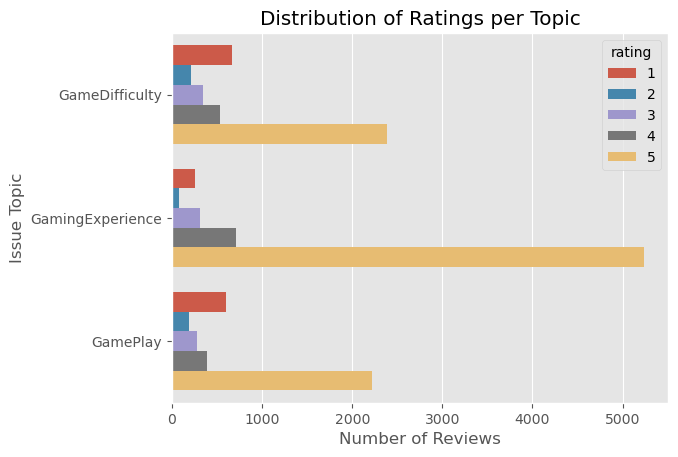

In [77]:
ax = sns.countplot(data=df, y="review_topic", hue="rating")
ax.set(xlabel='Number of Reviews', ylabel='Issue Topic',
       title='Distribution of Ratings per Topic')

plt.show()

It is easy to see that the number of 5-star reviews is overwhelming compared to the rest of the reviews. People seems to be quite satisfied with all features.
We can see that features for gaming experience created the highest number of reviewers, follow by game difficulty and lastly gameplay for facilities.

## Step 3. Wordcloud of positive and negative reviews

In [24]:
# !pip install -q contractions

In [81]:
import nltk
import re
from nltk.corpus import stopwords
import contractions
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

In [82]:
df.head(5)

,review_title,review_description,review_description_lower,rating,0_GameDifficulty,1_GamePlay,2_GamingExperience,review_topic
0,NaN,It's the best adults if r child is under 12 it...,<bound method Series.apply of 0 it's th...,5,0.450489,0.128723,0.420787,GameDifficulty
1,NaN,Logical,<bound method Series.apply of 0 it's th...,5,0.166845,0.179741,0.653414,GamingExperience
2,NaN,Id rate higher if it didnt force the extra bot...,<bound method Series.apply of 0 it's th...,2,0.215953,0.753701,0.030346,GamePlay
3,NaN,Wonderful game,<bound method Series.apply of 0 it's th...,5,0.542461,0.114942,0.342597,GameDifficulty
4,NaN,Nice,<bound method Series.apply of 0 it's th...,5,0.166667,0.166667,0.666665,GamingExperience


### Data cleaning

In [83]:
def clean_text(text):
    text = text.lower()
    # remove \n \t and non-alphanumeric
    text = re.sub("(\\t|\\n)", " ", text)
    text = re.sub("[^a-zA-Z']", " ", text)
    text = re.sub("(?:_|[^a-z0-9_:])[;:=]+[\)\(\-\[\]\/|DPO]", "", text)
    text = re.sub("[0-9]+", "", text)
    text = text.strip()
    # expanding the contractions
    text = ' '.join([contractions.fix(x) for x in text.split(" ")])
    return text.strip()

df["review_description_lower"] = df["review_description_lower"].apply
(lambda x: clean_text(x))

<function __main__.<lambda>(x)>

In [95]:
#data pre-processing - LEMMATIZATION
def lemma_preprocess_text(text_list):
    processed_text = []
     
    #Tokenize words
    tokens = [word_tokenize(text) for text in text_list]
    
    #Remove stop words
    stop_list = stopwords.words('english')
    stop_list.append("filler")
    text_stop = [[word for word in doc if word.lower() not in stop_list] for doc in tokens]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    text_lemma = [[lemmatizer.lemmatize(word) for word in doc] for doc in text_stop]
    
    return text_lemma

In [109]:
# Put each row of the 'review_description' column into a list on its own
text_list = df['review_description_lower'].tolist()

# Preprocess the text_list
lemma_processed_text = lemma_preprocess_text(text_list)

# Add the processed_text list as a new column in the dataframe
df['lemmatized_processed_text'] = lemma_processed_text

# Preview the processed data
df.head(5)

,review_title,review_description,review_description_lower,rating,0_GameDifficulty,1_GamePlay,2_GamingExperience,review_topic,lemmatized_processed_text
0,NaN,It's the best adults if r child is under 12 it...,it's the best adults if r child is under 12 it...,5,0.450489,0.128723,0.420787,GameDifficulty,"['s, best, adult, r, child, 12, actually, take..."
1,NaN,Logical,logical,5,0.166845,0.179741,0.653414,GamingExperience,[logical]
2,NaN,Id rate higher if it didnt force the extra bot...,id rate higher if it didnt force the extra bot...,2,0.215953,0.753701,0.030346,GamePlay,"[id, rate, higher, didnt, force, extra, bottle..."
3,NaN,Wonderful game,wonderful game,5,0.542461,0.114942,0.342597,GameDifficulty,"[wonderful, game]"
4,NaN,Nice,nice,5,0.166667,0.166667,0.666665,GamingExperience,[nice]


In [111]:
# reviews with rating >= 4
four_and_five = df[['rating'] >= 4]

# reviews with rating < 4
less_than_4 = df[df['rating'] < 4]

### Normal wordcloud

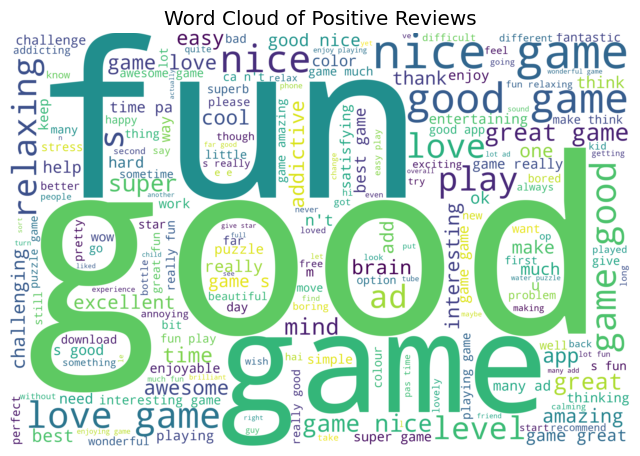

In [112]:
# 4&5 RATINGS  - word cloud

# extract the processed text column as a list of lists

four_and_five_text = four_and_five['lemmatized_processed_text'].tolist()

# join each inner list into a single string
four_and_five_rev_text = [" ".join(x) for x in four_and_five_text]

# join the list of strings into a single string
four_and_five_rev_text = " ".join(four_and_five_rev_text)

# tokenize the words
four_and_five_rev_tokens = word_tokenize(four_and_five_rev_text)

# create a word cloud
review_wordcloud = WordCloud(width = 3000, height = 2000, background_color="white").generate(" ".join(four_and_five_rev_tokens))

# plot the word cloud
plt.figure(figsize=(8,6))
plt.imshow(review_wordcloud, interpolation='bilinear')
plt.title("Word Cloud of Positive Reviews")
plt.axis("off")
plt.show()

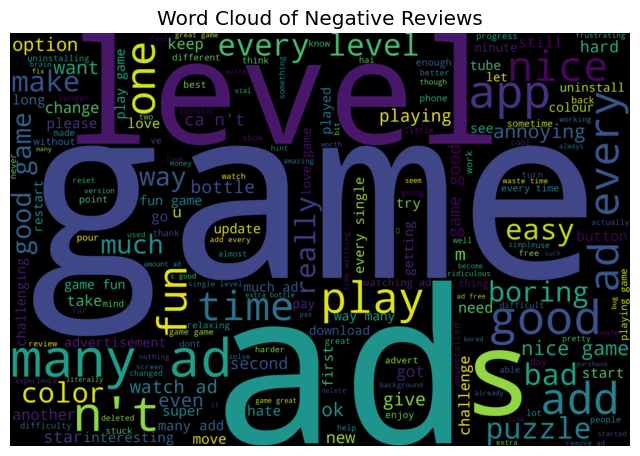

In [113]:
# LESS THAN 4 RATINGS  - word cloud

# extract the processed text column as a list of lists

less_than_4_text = less_than_4['lemmatized_processed_text'].tolist()

# join each inner list into a single string
less_than_4_rev_text = [" ".join(x) for x in less_than_4_text]

# join the list of strings into a single string
less_than_4_rev_text = " ".join(less_than_4_rev_text)

# tokenize the words
less_than_4_rev_tokens = word_tokenize(less_than_4_rev_text)

# create a word cloud
# wordcloud = WordCloud().generate(" ".join(tokens))
review_wordcloud = WordCloud(width = 3000, height = 2000, background_color="black").generate(" ".join(less_than_4_rev_tokens))

# plot the word cloud
plt.figure(figsize=(8,6))
plt.imshow(review_wordcloud, interpolation='bilinear')
plt.title("Word Cloud of Negative Reviews")
plt.axis("off")
plt.show()

Most of the words are indeed related to the game difficulty and users' experience: fun, good, game, level, ads, etc. Some negative words are more related to the users experience with the game: easy, ads, level, boring, best, etc.

## Step 4. VADER Sentiment Scoring


We will use NLTK's SentimentIntesityAnalyzer to get the neg/neu/pos scores of the text.
This uses a "bag of words" approach:
    1. Stop words are removed
    2. Each word is scored and combined to a total score

In [16]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

### Run the polarity score on the entire dataset

In [17]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    review = row['review_description']
    myid = row['ID']
    res[myid] = sia.polarity_scores(review)

  0%|          | 0/15721 [00:00<?, ?it/s]

### Add the result to the dataset

In [18]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'ID'})
vaders = vaders.merge(df, how='left')

In [19]:
vaders.head(10)

,ID,neg,neu,pos,compound,source,review_id,user_name,review_title,review_description,rating,review_date
0,1,0.000,0.717,0.283,0.9118,Google Play,98fa93e6-9824-4925-be65-703b1bd14b6e,Ernesto Abussi,NaN,It's the best adults if r child is under 12 it...,5,2023-06-23 13:51:00
1,2,0.000,1.000,0.000,0.0000,Google Play,4558d26c-c223-46f1-a147-6b9e481ca104,Mary Pinkston,NaN,Logical,5,2023-06-20 23:00:46
2,3,0.000,1.000,0.000,0.0000,Google Play,fc75e6be-52a2-40cd-889c-5d52d58c5329,Viking,NaN,Id rate higher if it didnt force the extra bot...,2,2023-06-19 06:58:16
3,4,0.000,0.213,0.787,0.5719,Google Play,e5251950-a650-493f-aa44-bb555906f599,Elsie Ludick,NaN,Wonderful game,5,2023-06-19 01:56:45
4,5,0.000,0.000,1.000,0.4215,Google Play,f8e293e0-c40a-4a33-b941-887a88e540ff,Hasan Khalil,NaN,Nice,5,2023-06-18 07:50:42
5,6,0.000,0.392,0.608,0.7351,Google Play,b0c31bfa-468d-4a34-8c4d-15f56470c87f,Masingita Wonder,NaN,Lovely game to play during lunch,5,2023-06-16 19:45:44
6,7,0.000,0.000,1.000,0.5859,Google Play,f1153b25-09a8-4b7f-9dd7-90b829e074d5,Hope Chereni,NaN,Amazing,5,2023-06-15 22:04:38
7,8,0.000,0.204,0.796,0.5984,Google Play,1a271617-3755-4657-aa1f-e73b33fd4676,Semir Mussa3310,NaN,So fantastic 👏,5,2023-06-15 18:01:12
8,9,0.000,1.000,0.000,0.0000,Google Play,4910f4b7-8bbb-4385-820c-54be8fcbcf3d,Ramsharan Ramsharn gurjar,NaN,Xxx,2,2023-06-14 14:13:49
9,10,0.588,0.412,0.000,-0.6908,Google Play,726b018d-ba00-4cda-b419-0cee9c1296fb,Anil pratap Singh,NaN,Jitne ke bad no mony ricevsd,1,2023-06-14 07:52:24


In [20]:
vaders.describe()

,ID,neg,neu,pos,compound,rating
count,15721.000000,15721.000000,15721.000000,15721.000000,15721.000000,15721.000000
mean,7861.000000,0.037220,0.477332,0.477370,0.354864,4.228230
std,4538.406126,0.122919,0.362765,0.378846,0.354476,1.342947
min,1.000000,0.000000,0.000000,0.000000,-0.985300,1.000000
25%,3931.000000,0.000000,0.196000,0.000000,0.000000,4.000000
50%,7861.000000,0.000000,0.432000,0.499000,0.440400,5.000000
75%,11791.000000,0.000000,0.804000,0.794000,0.624900,5.000000
max,15721.000000,1.000000,1.000000,1.000000,0.998000,5.000000


### Plot VADER results

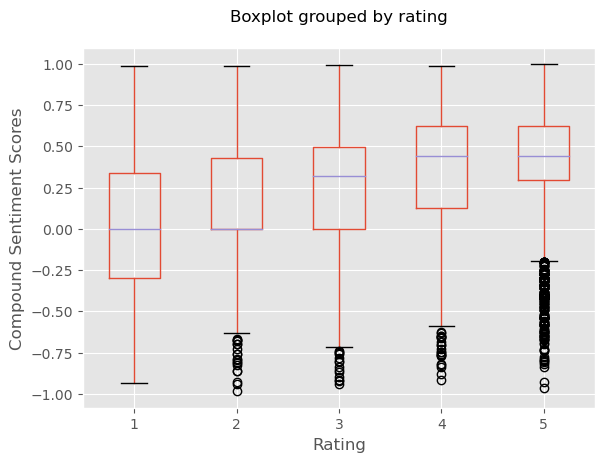

In [23]:
vaders.boxplot(column=['compound'], by='rating').set(xlabel='Rating')
plt.title('') 
plt.ylabel('Compound Sentiment Scores')
plt.show()

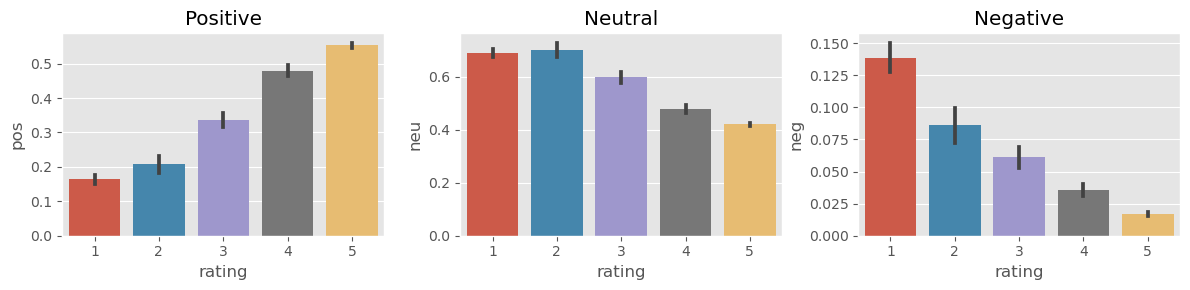

In [22]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='rating', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='rating', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

It confirms what I hope to see and shows that vader is valuable in having this connection between the score of the text and sentiment rating. It relates to the actual rating review of the users. We can see that positivity is higher as the rating is higher in terms of stars and vice versa.